# Running The Model

### Propagation Network

### Init

In [1]:
import os
import hack
from DatasetLoader import *
from DataGenerator import *
import pickle
with open('../Models/Dataset_Simple_scaler.pickle', 'rb') as handle:
    dataset_scaler = pickle.load(handle, encoding="latin1")

In [2]:
import os
TEST_PATH='../Test_Results/Prop-Network-Fixed'
if os.path.exists(TEST_PATH):
    print(Exception('This directory already exists'));
else:    
    os.mkdir(TEST_PATH);
    os.mkdir(TEST_PATH+'/saved_models')

This directory already exists


In [3]:
## ALT
my_dataset9 = MyDataset(PATH='../Data/DATASET_FIXED_ONLY/9Objects/',n_of_scene=1100,n_of_exp=4,n_of_obj=9,f_size=8,n_of_rel_type=1,fr_size=240,scaler=dataset_scaler)    
my_dataset6 = MyDataset(PATH='../Data/DATASET_FIXED_ONLY/6Objects/',n_of_scene=50,n_of_exp=4,n_of_obj=6,f_size=8,n_of_rel_type=1,fr_size=240,scaler=dataset_scaler)    
my_dataset12 = MyDataset(PATH='../Data/DATASET_FIXED_ONLY/12Objects/',n_of_scene=50,n_of_exp=4,n_of_obj=12,f_size=8,n_of_rel_type=1,fr_size=240,scaler=dataset_scaler)    
my_dataset9.divideDataset(9.0/11,1.5/11)
my_dataset6.divideDataset(0.0,0.5)
my_dataset12.divideDataset(0.0,0.5)

  0%|                                                                                                                                                                                       | 0/50 [00:00<?, ?it/s]


In [4]:
my_dataset_test6 = MyDataset2(PATH='../Data/DATASET_TEST_Simple/6Objects/',n_of_scene=50,n_of_exp=4,n_of_groups=7,n_of_obj=6,f_size=5,n_of_rel_type=1,fr_size=50,scaler=dataset_scaler)
my_dataset_test6.divideDataset(0,0)
my_dataset_test8 = MyDataset2(PATH='../Data/DATASET_TEST_Simple/8Objects/',n_of_scene=50,n_of_exp=4,n_of_groups=10,n_of_obj=8,f_size=5,n_of_rel_type=1,fr_size=50,scaler=dataset_scaler)
my_dataset_test8.divideDataset(0,0)
my_dataset_test9 = MyDataset2(PATH='../Data/DATASET_TEST_Simple/9Objects/',n_of_scene=50,n_of_exp=4,n_of_groups=12,n_of_obj=9,f_size=5,n_of_rel_type=1,fr_size=50,scaler=dataset_scaler)
my_dataset_test9.divideDataset(0,0)

  0%|                                                                                                                                                                                       | 0/50 [00:00<?, ?it/s]


### Network Creation

In [5]:
import hack
from Networks import *
Pns= PropagationNetwork()
Pn1=Pns.getModel(10,6,1)

In [7]:
from Test import *

Pns.setModel(10,'../Models/PN_fixed.hdf5')
_=Pns.getModel(7,6,1)
_=Pns.getModel(9,6,1)
_=Pns.getModel(10,6,1)
_=Pns.getModel(13,6,1)

### Running Model on Test Set Sparse

In [8]:
xy_origin_pos9,xy_calculated_pos9,r9,edge9=Test(my_dataset9,Pns,200,dataset_scaler.relation_threshold)
xy_origin_pos6,xy_calculated_pos6,r6,edge6=Test(my_dataset6,Pns,200,dataset_scaler.relation_threshold)
xy_origin_pos12,xy_calculated_pos12,r12,edge12=Test(my_dataset12,Pns,200,dataset_scaler.relation_threshold)

mse-pos: -0.969978117785957
mse-vel: -10.391441959576596
mse-pos: -4.313840778171972
mse-vel: -13.802156746120167
mse-pos: -0.8820940510485938
mse-vel: -10.353931362187321


### Creating Test Videos

In [9]:
os.mkdir(TEST_PATH+'/TestVideos/')
os.mkdir(TEST_PATH+'/TestVideos/9-Sparse')
os.mkdir(TEST_PATH+'/TestVideos/6-Sparse')
os.mkdir(TEST_PATH+'/TestVideos/12-Sparse')

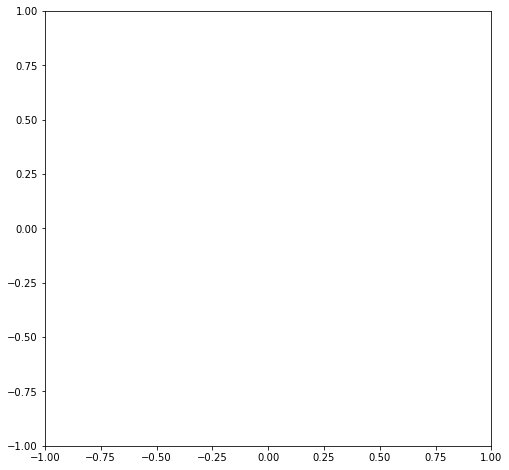

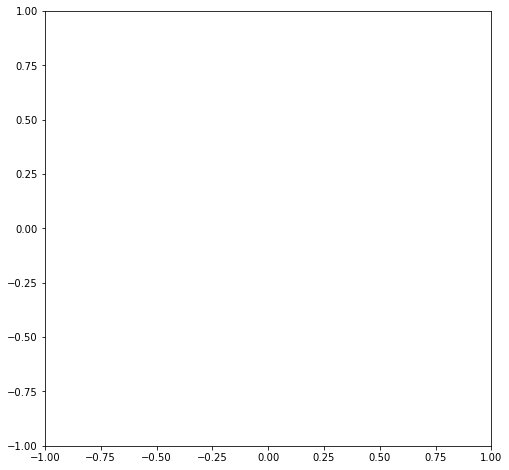

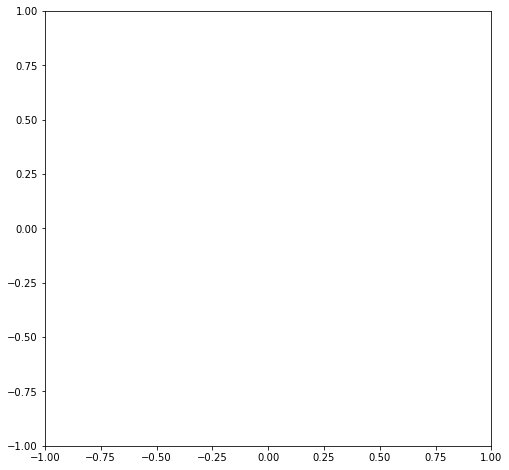

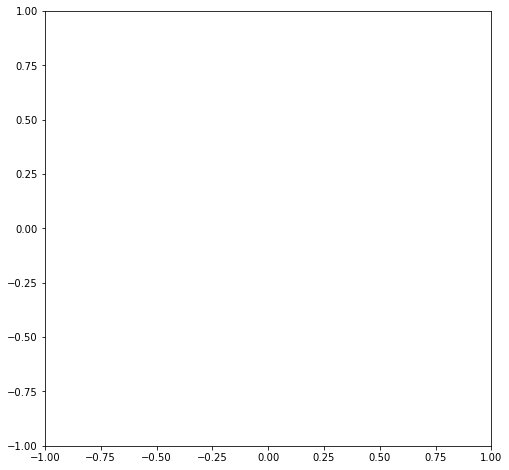

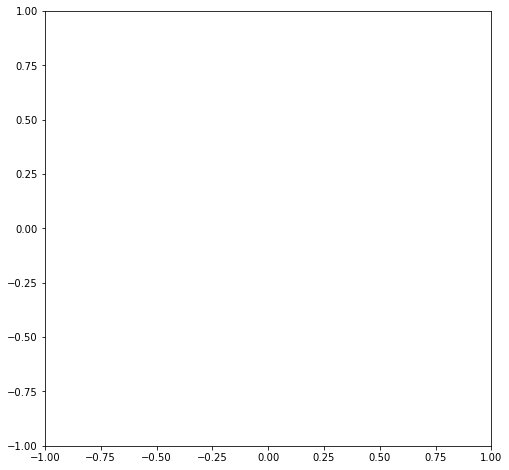

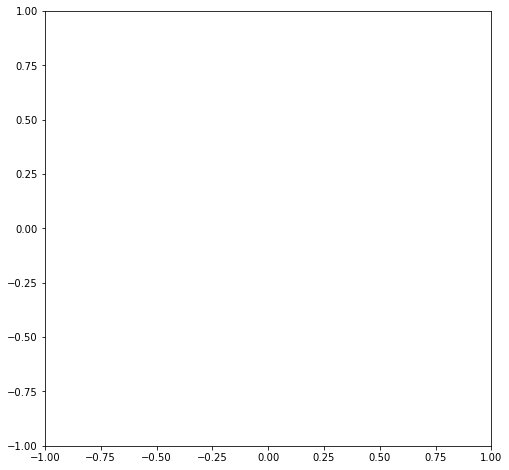

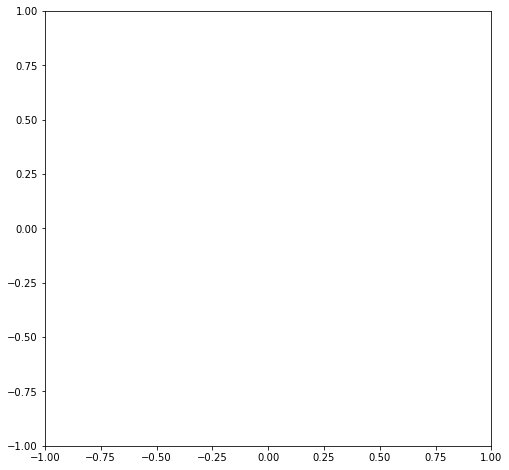

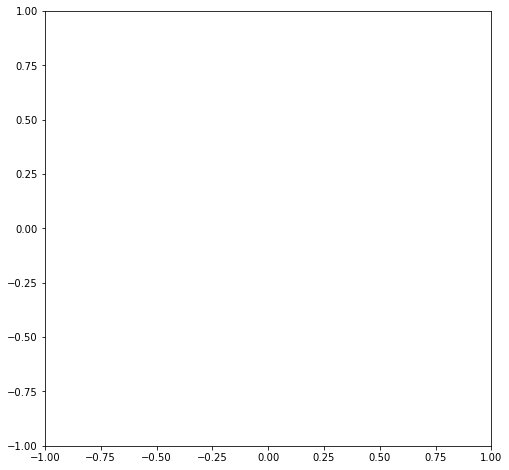

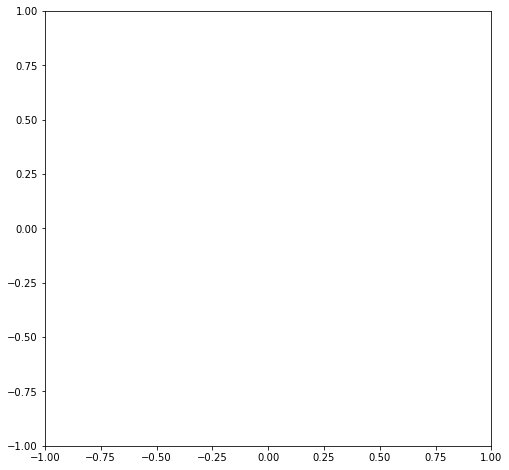

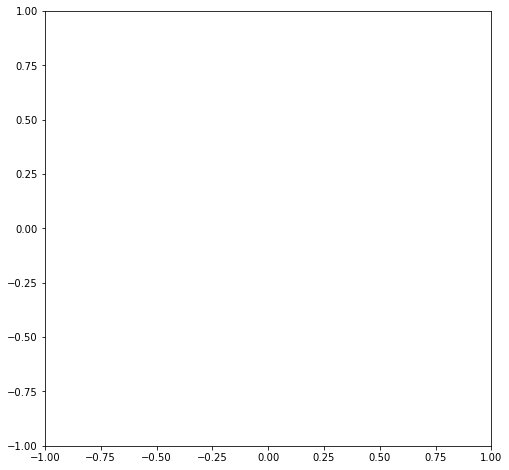

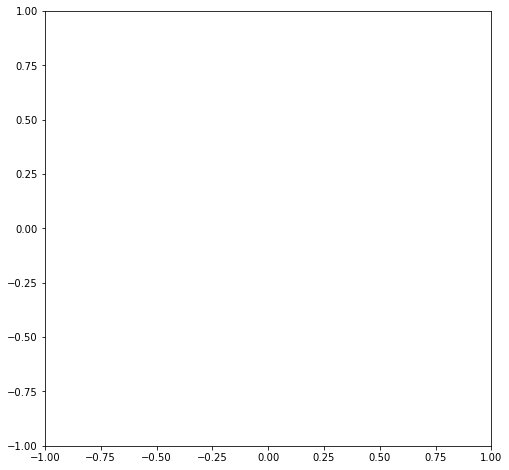

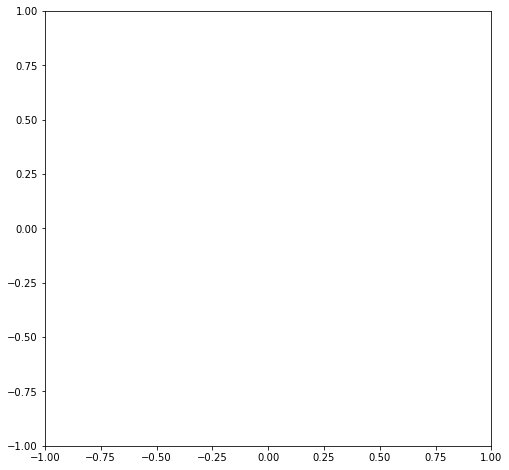

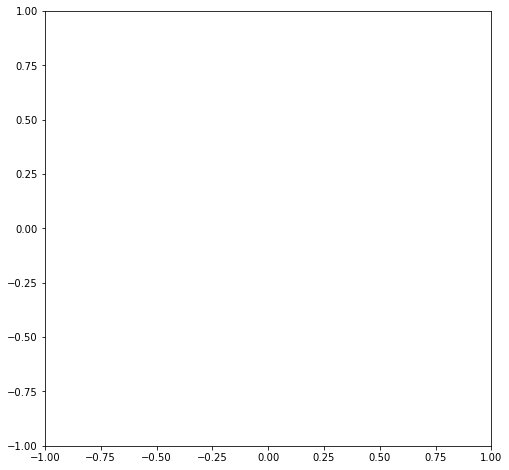

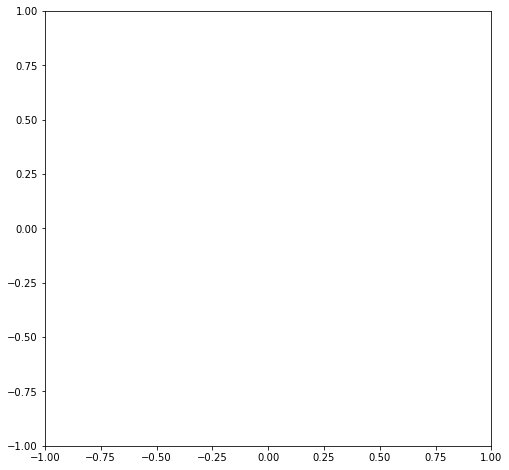

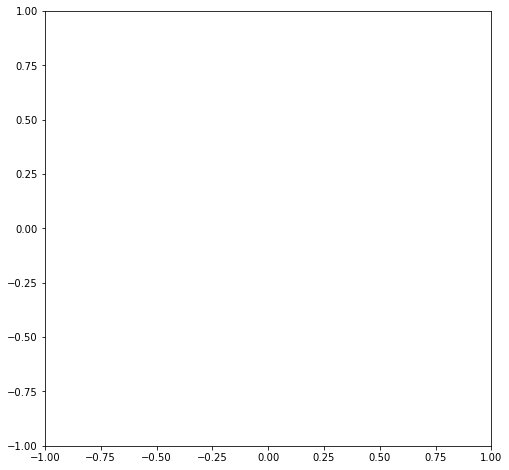

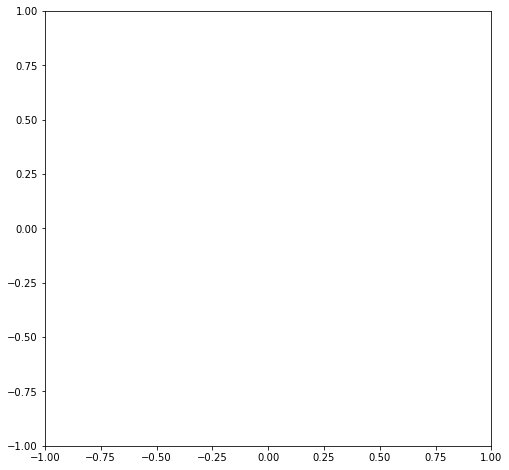

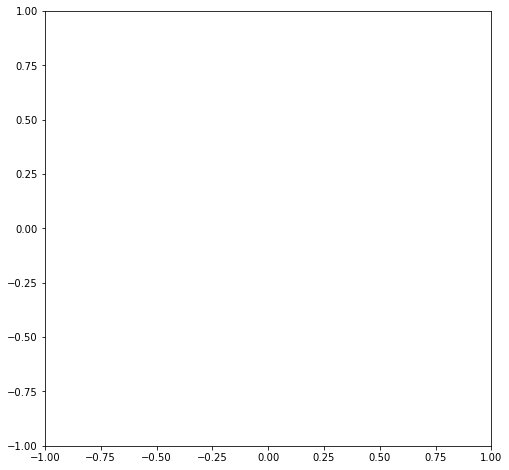

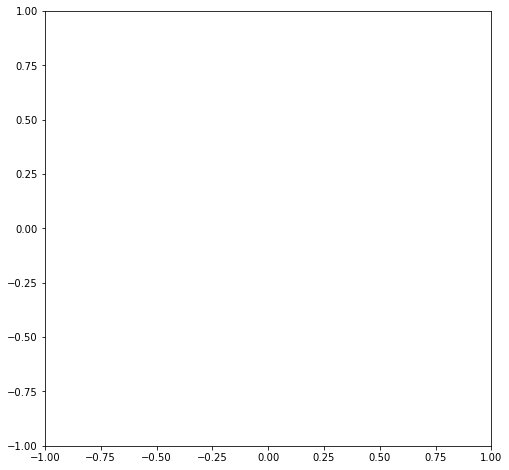

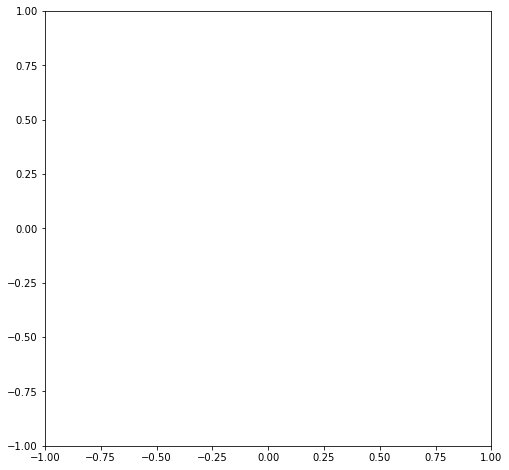

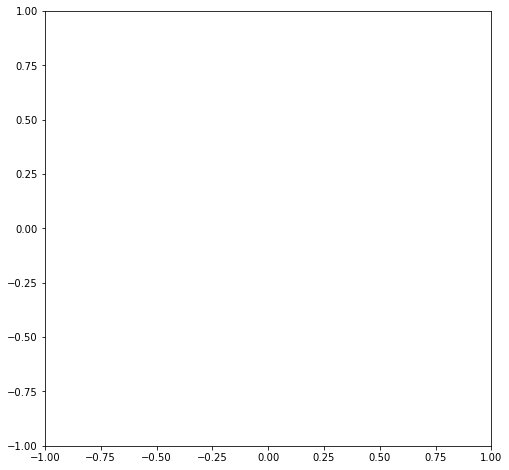

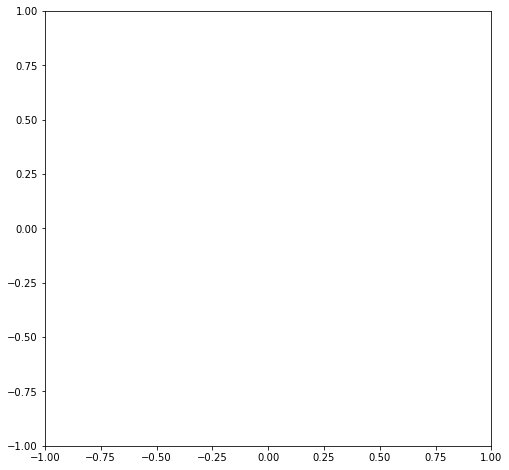

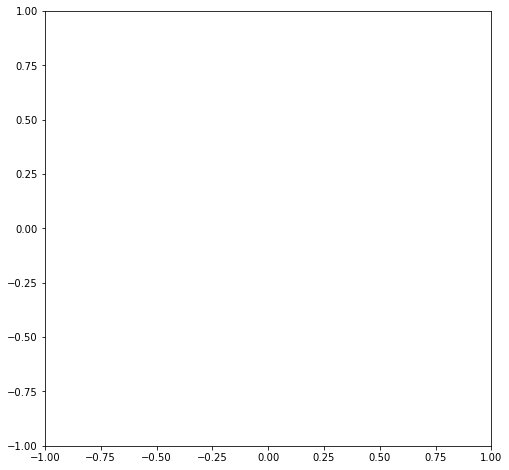

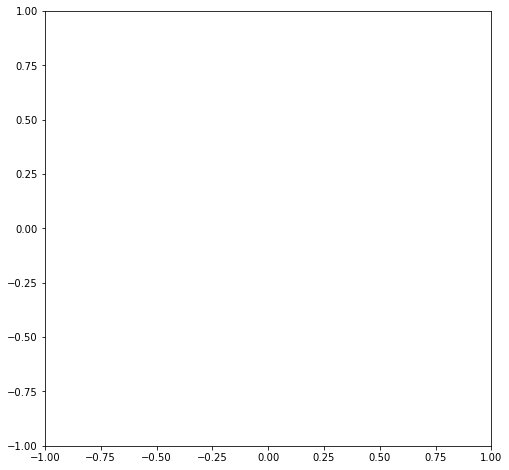

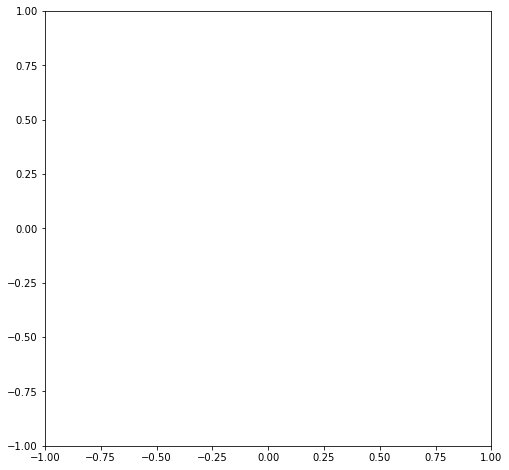

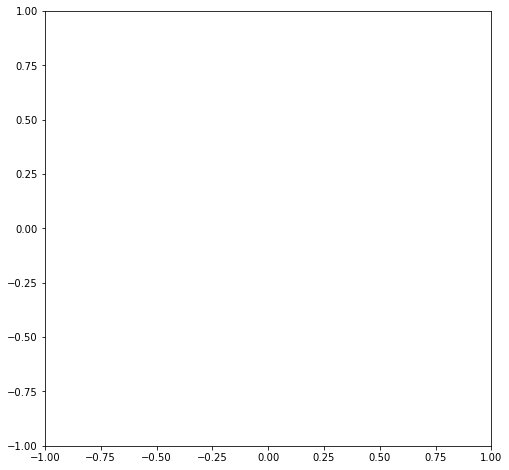

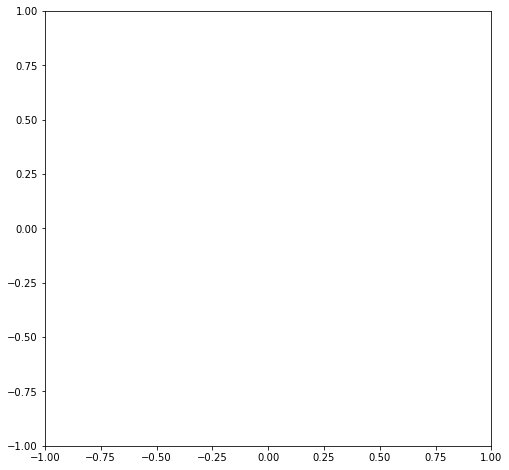

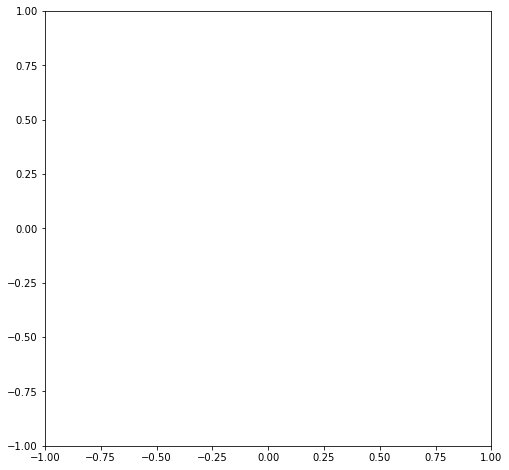

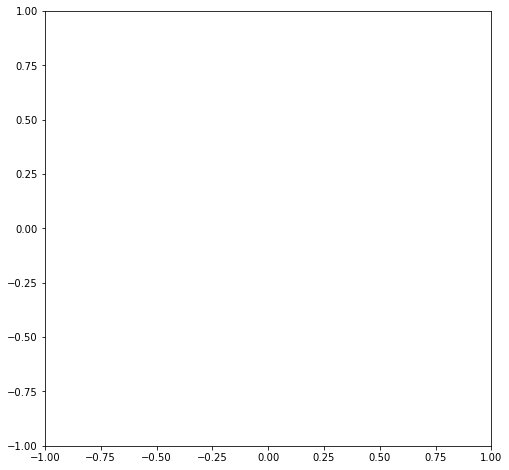

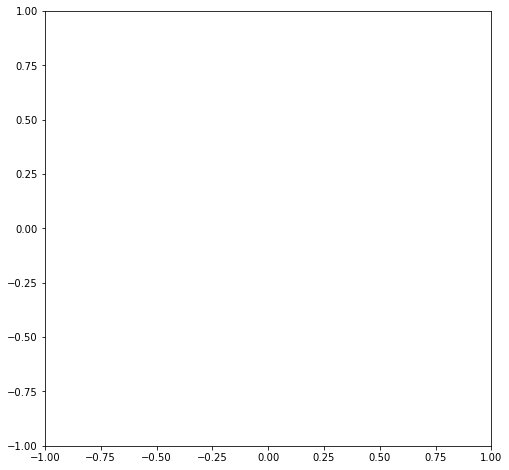

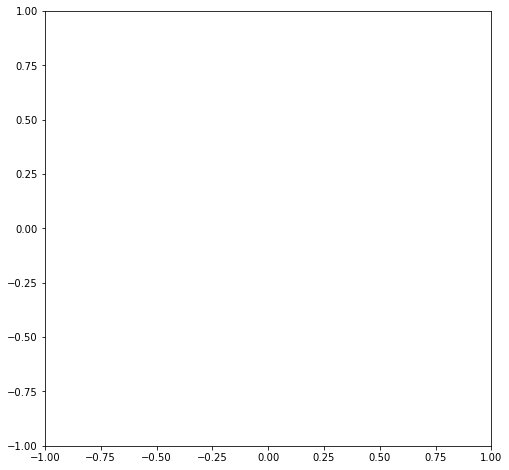

In [10]:
from IPython.display import clear_output
import os
for ii in range(1,10,1):
    make_video_Fixed(xy_calculated_pos9[ii,:,:,:],r9[ii,:],edge9[ii],TEST_PATH+'/TestVideos/9-Sparse/test_'+str(ii)+'.mp4')
    make_video_Fixed(xy_origin_pos9[ii,:,:,:],r9[ii,:],edge9[ii],TEST_PATH+'/TestVideos/9-Sparse/true_'+str(ii)+'.mp4')
    clear_output()
for ii in range(1,10,3):
    make_video_Fixed(xy_calculated_pos6[ii,:,:,:],r6[ii,:],edge6[ii],TEST_PATH+'/TestVideos/6-Sparse/test_'+str(ii)+'.mp4')
    make_video_Fixed(xy_origin_pos6[ii,:,:,:],r6[ii,:],edge6[ii],TEST_PATH+'/TestVideos/6-Sparse/true_'+str(ii)+'.mp4')
    clear_output()
for ii in range(1,10,3):
    make_video_Fixed(xy_calculated_pos12[ii,:,:,:],r12[ii,:],edge12[ii],TEST_PATH+'/TestVideos/12-Sparse/test_'+str(ii)+'.mp4')
    make_video_Fixed(xy_origin_pos12[ii,:,:,:],r12[ii,:],edge12[ii],TEST_PATH+'/TestVideos/12-Sparse/true_'+str(ii)+'.mp4')
    clear_output()

### Running Model on Test Set Dense

In [11]:
xy_origin_pos6,xy_calculated_pos6,r6,edge6=Test(my_dataset_test6,Pns,50,dataset_scaler.relation_threshold)
xy_origin_pos8,xy_calculated_pos8,r8,edge8=Test(my_dataset_test8,Pns,50,dataset_scaler.relation_threshold)
xy_origin_pos9,xy_calculated_pos9,r9,edge9=Test(my_dataset_test9,Pns,50,dataset_scaler.relation_threshold)

mse-pos: -7.1400778416026975
mse-vel: -13.536309240757491
mse-pos: -6.623350191469039
mse-vel: -13.295342990802789
mse-pos: -4.193957450575113
mse-vel: -10.606040949412566


In [12]:
os.mkdir(TEST_PATH+'/TestVideos/6-Dense')
os.mkdir(TEST_PATH+'/TestVideos/8-Dense')
os.mkdir(TEST_PATH+'/TestVideos/9-Dense')

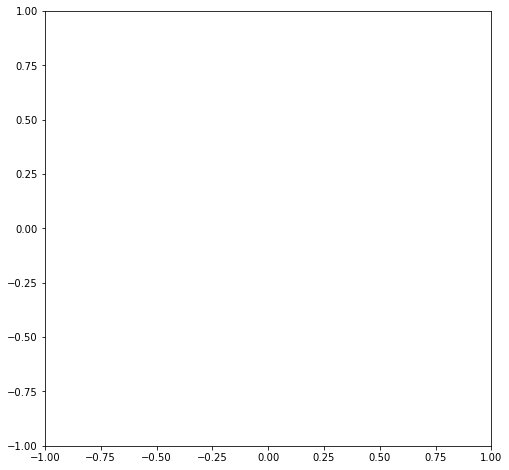

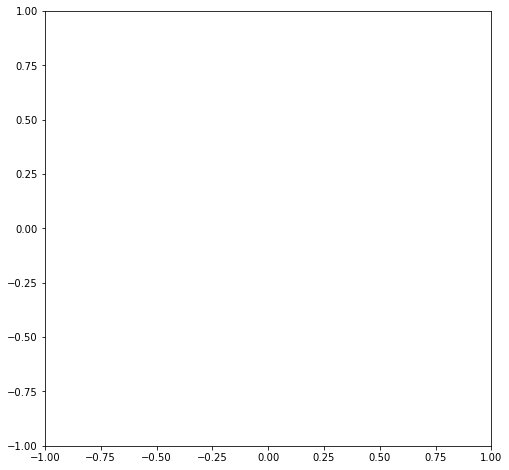

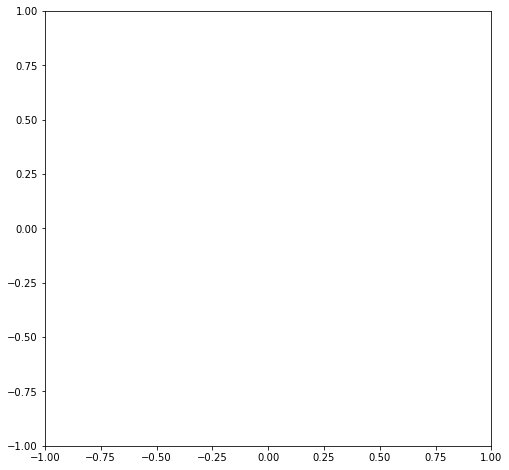

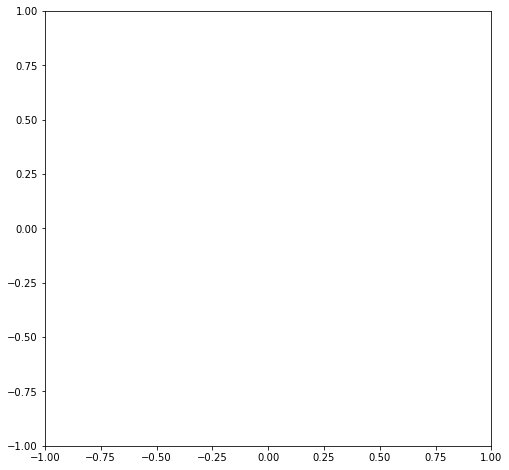

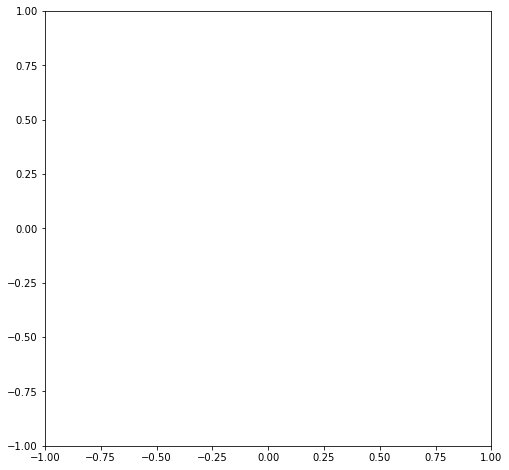

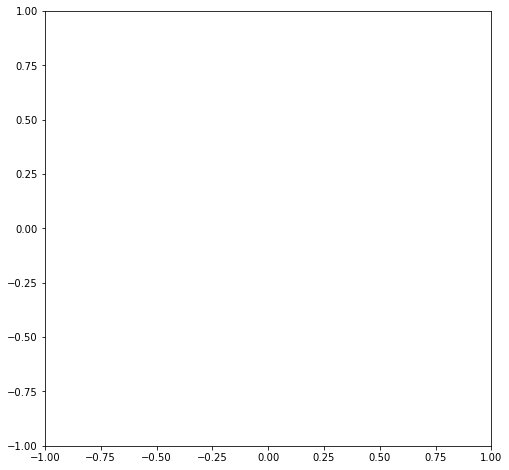

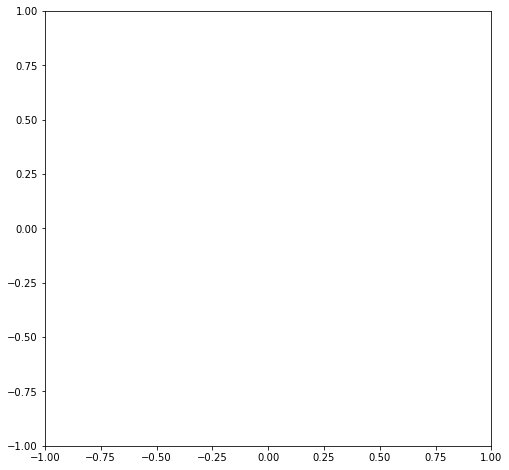

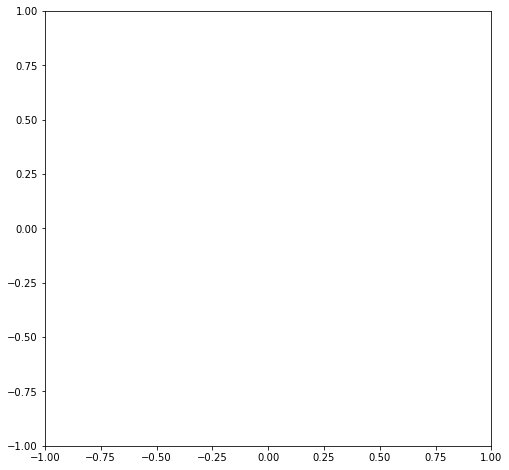

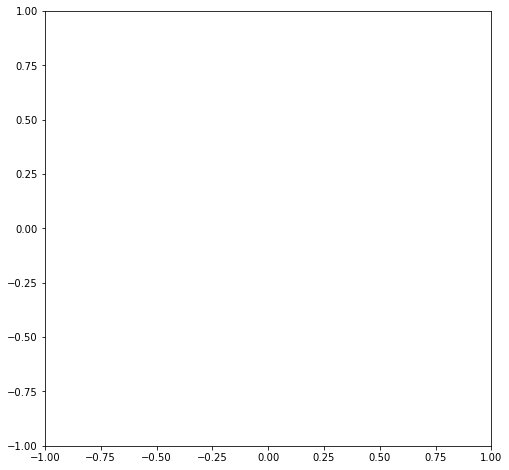

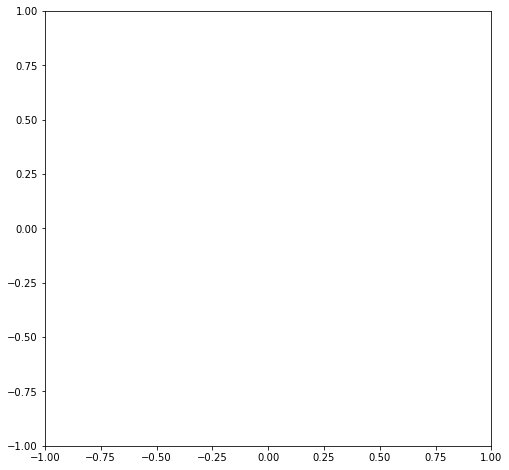

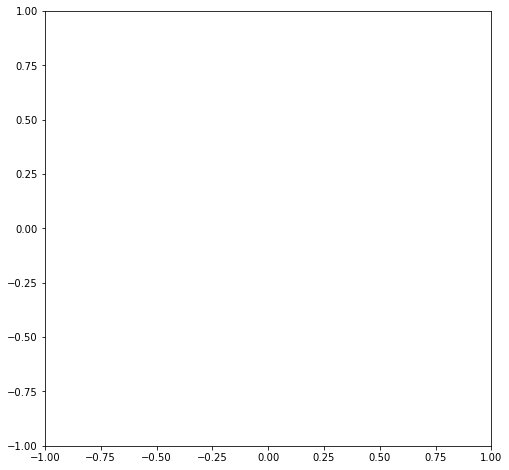

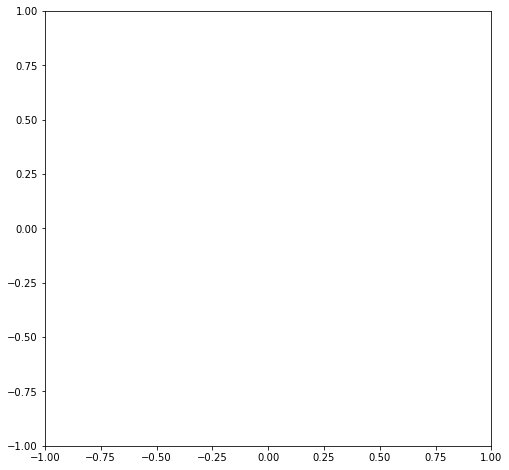

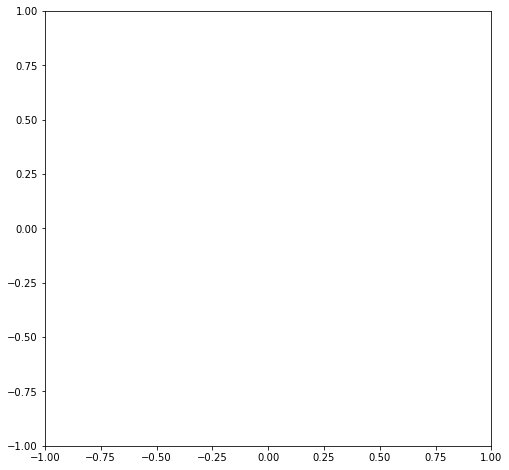

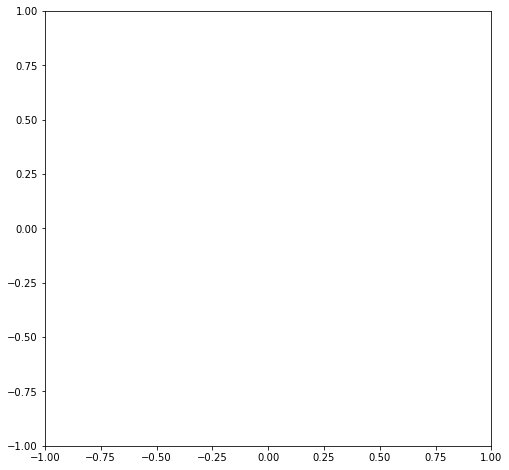

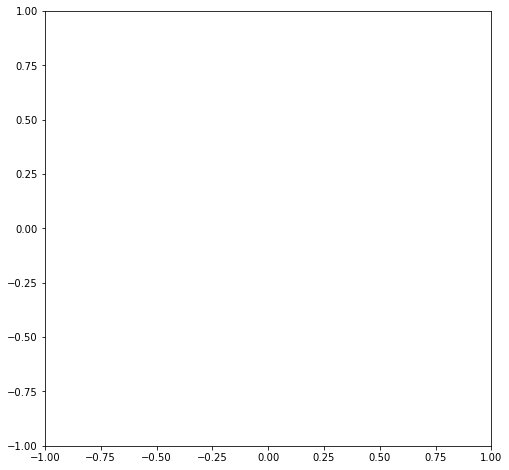

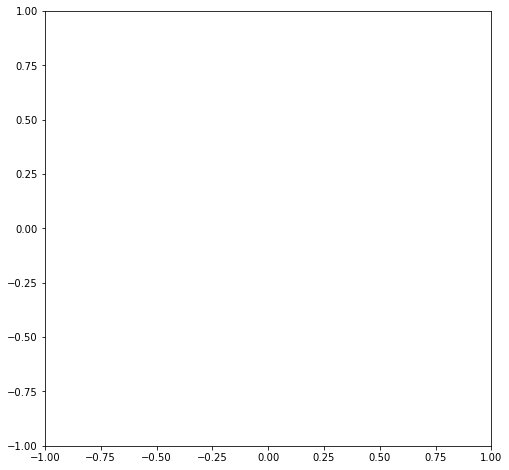

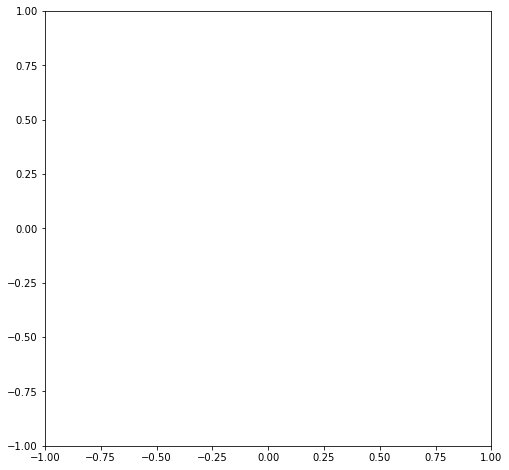

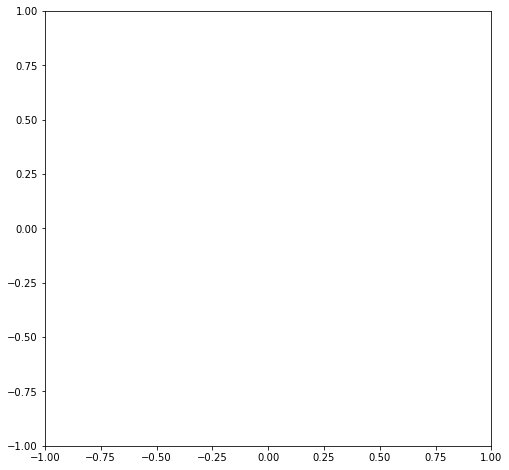

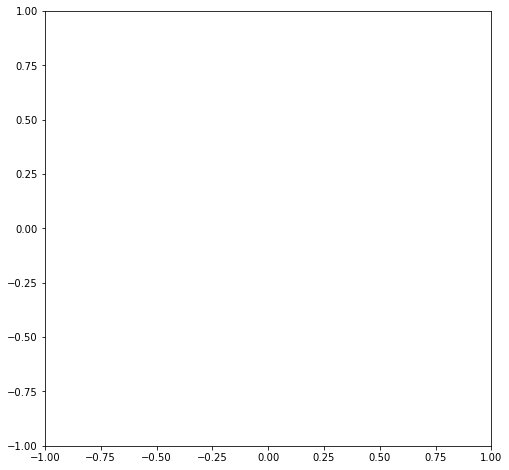

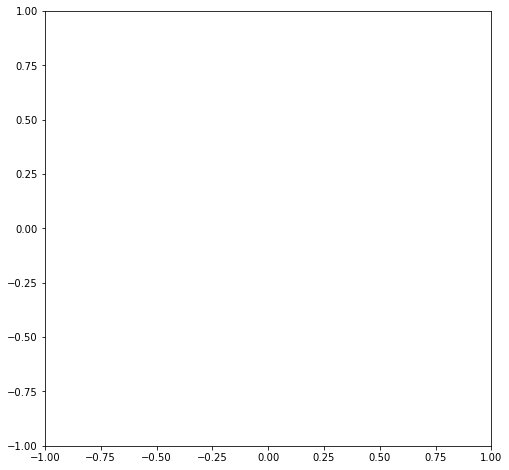

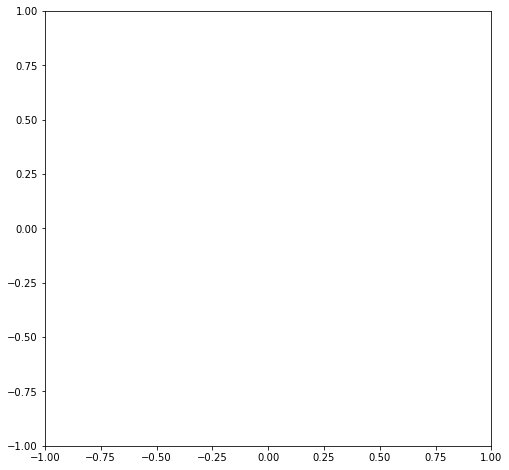

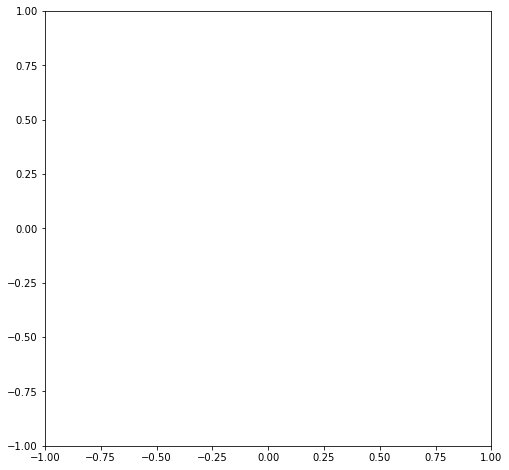

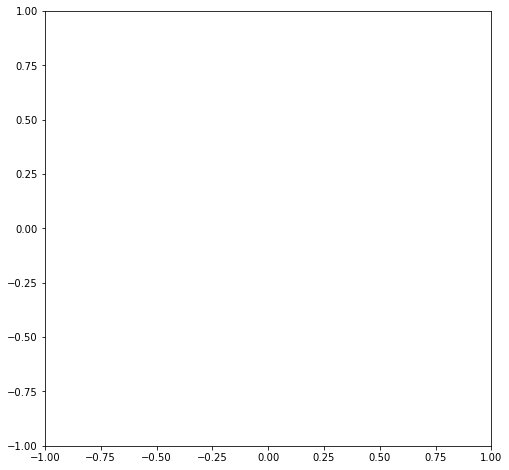

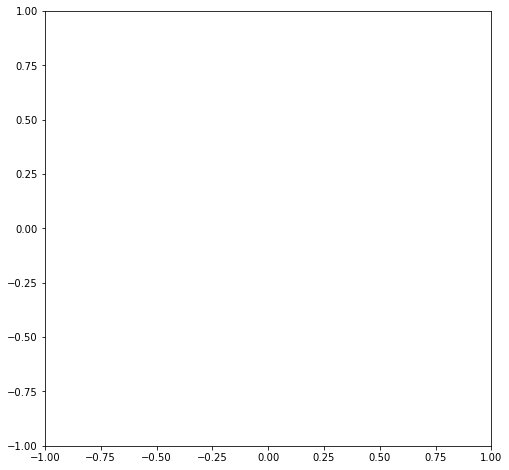

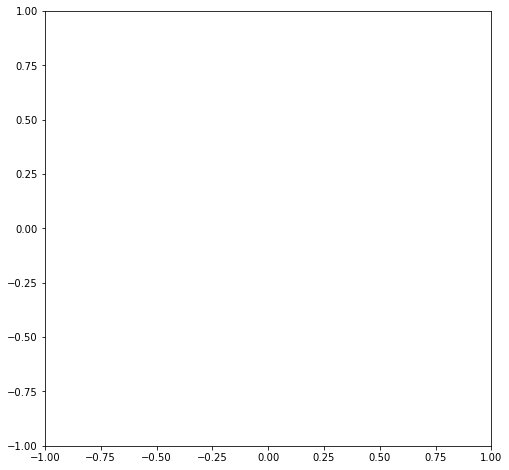

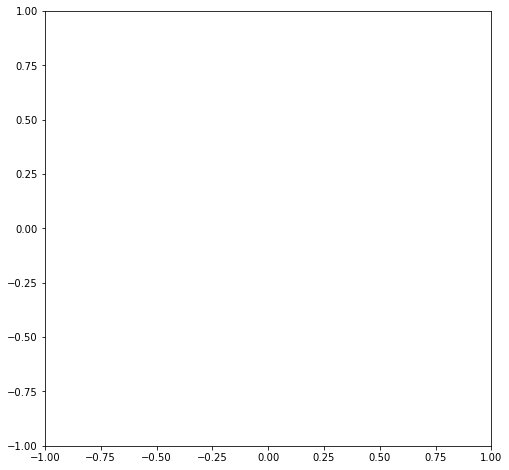

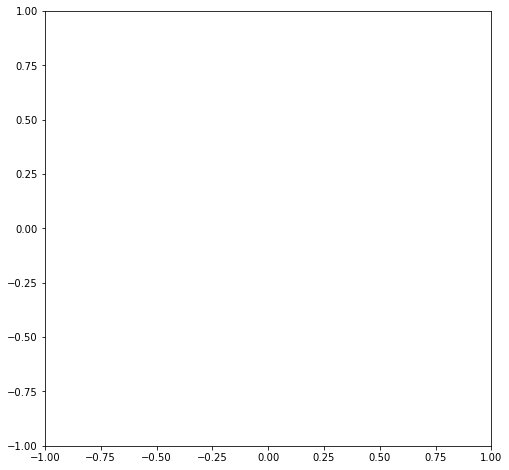

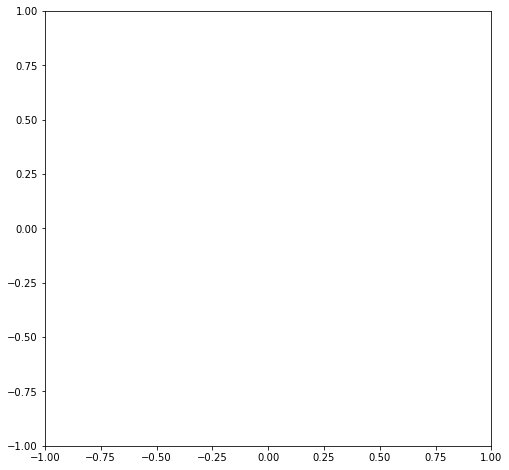

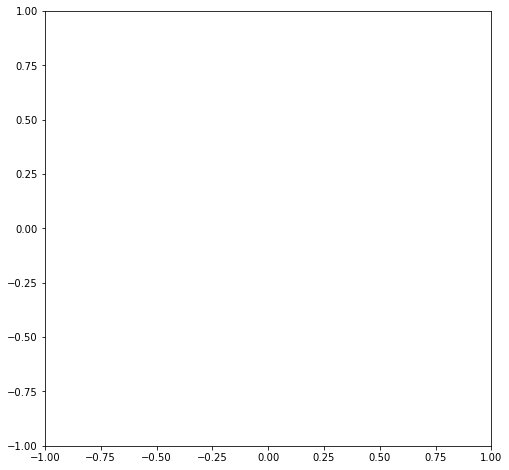

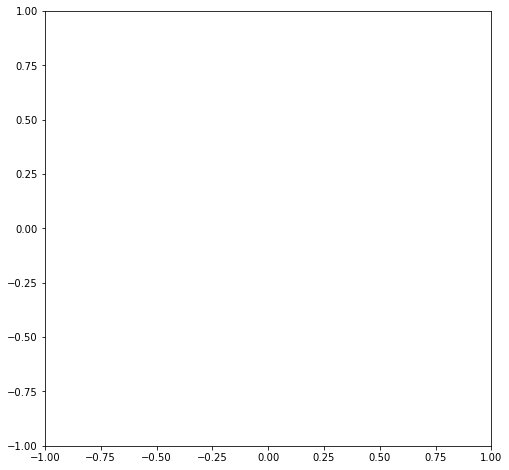

In [13]:
from IPython.display import clear_output
import os
for ii in range(1,10,1):
    make_video_Fixed(xy_calculated_pos6[ii,:,:,:],r6[ii,:],edge6[ii],TEST_PATH+'/TestVideos/6-Dense/test_'+str(ii)+'.mp4')
    make_video_Fixed(xy_origin_pos6[ii,:,:,:],r6[ii,:],edge6[ii],TEST_PATH+'/TestVideos/6-Dense/true_'+str(ii)+'.mp4')
    clear_output()
for ii in range(1,10,3):
    make_video_Fixed(xy_calculated_pos8[ii,:,:,:],r8[ii,:],edge8[ii],TEST_PATH+'/TestVideos/8-Dense/test_'+str(ii)+'.mp4')
    make_video_Fixed(xy_origin_pos8[ii,:,:,:],r8[ii,:],edge8[ii],TEST_PATH+'/TestVideos/8-Dense/true_'+str(ii)+'.mp4')
    clear_output()
for ii in range(1,10,3):
    make_video_Fixed(xy_calculated_pos9[ii,:,:,:],r9[ii,:],edge9[ii],TEST_PATH+'/TestVideos/9-Dense/test_'+str(ii)+'.mp4')
    make_video_Fixed(xy_origin_pos9[ii,:,:,:],r9[ii,:],edge9[ii],TEST_PATH+'/TestVideos/9-Dense/true_'+str(ii)+'.mp4')
    clear_output()

## Training

In [14]:
TrainDg9_PN=DataGenerator(10,1,240,3600,my_dataset9.data_tr,my_dataset9.r_i_tr,my_dataset9.scaler.relation_threshold,True,64)
valDg9_PN=DataGenerator(10,1,240,600,my_dataset9.data_val,my_dataset9.r_i_val,my_dataset9.scaler.relation_threshold,False,128)
testDg_PN=DataGenerator(10,1,240,200,my_dataset9.data_test,my_dataset9.r_i_test,my_dataset9.scaler.relation_threshold,False,100,False)

In [15]:
import hack
from Networks import *
Pns= PropagationNetwork()
Pn1=Pns.getModel(10,6,1)

from Callbacks import *
import os
gauss_callback=Change_Noise_Callback(TrainDg9_PN)
test_metrics= Test_My_Metrics_Callback(Pns,3,1,my_dataset9.scaler,dataset_0=my_dataset9,dataset_1=my_dataset6,dataset_2=my_dataset12)
plt_callback=PlotLosses(TEST_PATH+'/Networks_logs.csv',3,[10,7,13])
reduce_lr= keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.8,verbose=1, patience=20, mode='auto', cooldown=20)
save_model= keras.callbacks.ModelCheckpoint(TEST_PATH+'/saved_models/weights.{epoch:02d}.hdf5', monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=1)


SyntaxError: invalid syntax (Callbacks.py, line 109)

In [ ]:
Pn1.fit_generator(generator=TrainDg9_PN,
                 validation_data=valDg9_PN,
                 epochs=250,
                 use_multiprocessing=True,
                  workers=32,
                  callbacks=[reduce_lr,test_metrics,plt_callback,save_model], 
                 verbose=1)